---
# Documentation: https://wowchemy.com/docs/managing-content/

title: "Melihat pertumbuhan konsumsi Indonesia"
subtitle: ""
summary: ""
authors: [admin]
tags: [ekonomi]
categories: [ekonomi]
date: 2025-03-23T12:06:59+07:00
lastmod: 2025-03-23T12:06:59+07:00
featured: false
draft: false

# Featured image
# To use, add an image named `featured.jpg/png` to your page's folder.
# Focal points: Smart, Center, TopLeft, Top, TopRight, Left, Right, BottomLeft, Bottom, BottomRight.
image:
  caption: ""
  focal_point: ""
  preview_only: false

# Projects (optional).
#   Associate this post with one or more of your projects.
#   Simply enter your project's folder or file name without extension.
#   E.g. `projects = ["internal-project"]` references `content/project/deep-learning/index.md`.
#   Otherwise, set `projects = []`.
projects: []
---

Belakangan ini banyak reportase tentang lemahnya kelas menengah Indonesia saat ini. Kelas menengah Indonesia terus berkurang sejak 2018 hingga saat ini [tinggal 17% total penduduk](https://databoks.katadata.co.id/infografik/2024/09/05/populasi-kelas-menengah-indonesia-kian-berkurang). Padahal, pertumbuhan konsumsi acapkali mengandalkan kelas menengah. Benar saja, pertumbuhan konsumsi Indonesia memang telah lama berada di bawah kecepatan negara-negara lain di kawasan, kecuali Thailand.

<iframe src="https://data.worldbank.org/share/widget?end=2023&indicators=NE.CON.TOTL.KD.ZG&locations=ID-TH-VN-PH-MY&start=2013" width='900' height='600' frameBorder='0' scrolling="no" ></iframe>




<Axes: xlabel='date', ylabel='Consumption'>

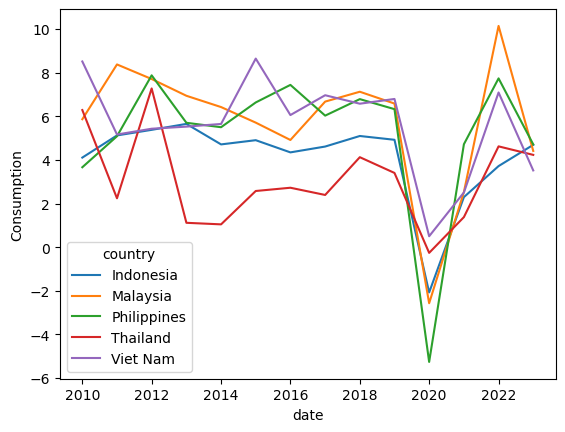

In [9]:
import seaborn as sns
import matplotlib as plt
import pandas as pd
import wbdata as wb

indi={"NE.CON.TOTL.KD.ZG":"Consumption"}

data=wb.get_dataframe(indi,country=["IDN","MYS","THA","VNM","PHL"],date=("2010","2024"),parse_dates=True)
sns.lineplot(data=data,x="date",y="Consumption",hue="country")

Pertumbuhan konsumsi Indonesia telah cukup lama berada di bawah kecepatan pertumbuhan ekonomi secara umum. Kok bisa ya pertumbuhan ekonomi bisa lebih cepat dari pertumbuhan konsumsi?

Salah satu penjelasannya adalah karena pertumbuhan ekonomi ini dinikmati oleh pihak-pihak yang tidak terlalu tinggi _consumption share_-nya. Consumption share adalah bagian dari pendapatan seseorang yang digunakan untuk konsumsi. Biasanya, pihak-pihak ini adalah antara orang kaya atau perusahaan. Pihak-pihak ini sudah memiliki konsumsi yang tinggi. Pertambahan pendapatan untuk pihak-pihak ini lebih banyak digunakan untuk meningkatkan asetnya (menabung), atau meningkatkan konsumsinya di luar negeri. Saya sempat membahas permasalahan ini di [The Conversation Indonesia](https://theconversation.com/jokowi-resah-tabungan-mengendap-rp-690-triliun-di-bank-betulkah-masyarakat-yang-harus-belanja-200929).

Saya akan mencoba eksplorasi teori ini dengan menunjukkan 2 hal: (1) saving rate Indoensia semakin meningkat, dan (2) menurunnya labor share. Kedua hal ini saya tunjukkan dengan menggunakan [Total Ekonomi - Neraca Institusi Terintegrasi ( triliun rupiah), 2016 - 2023](https://www.bps.go.id/id/statistics-table/1/MjE4MSMx/total-ekonomi---neraca-institusi-terintegrasi---triliun-rupiah---2016---2023.html) dari BPS. Neraca ini adalah data yang sangat berguna dan menarik karena memiliki perhitungan semua 3 metode perhitungan Produk Domestik Bruto (PDB). Datanya saya olah sedikit dan dapat dilihat di akhir postingan ini.

## Saving rate yang meningkat

Saving rate menunjukkan seberapa besar pendapatan yang disimpan oleh masyarakat. Saving rate yang tinggi menunjukkan masyarakat lebih banyak menabung daripada mengkonsumsi. Seperti diskusi di atas, neraca ekonomi tidak membedakan siapa pemilik saving rate tersebut, tapi biasanya kenaikan saving rate yang sangat tinggi menunjukkan semakin tingginya _income share_ dari pihak yang lebih mungkin menabung, seperti orang kaya atau perusahaan.


In [20]:
data=pd.read_excel("neraca.xlsx",sheet_name="Sheet3")
dat=data[["tahun","LS","KS"]]
dat=dat.melt("tahun",var_name="jenis",value_name="nilai")
det=data[["tahun","srhh"]]

[Text(0.5, 0, ''),
 Text(0, 0.5, '(%)'),
 Text(0.5, 1.0, 'Saving rate (i.e., disposable income minus consumption),\nfrom Neraca Ekonomi BPS')]

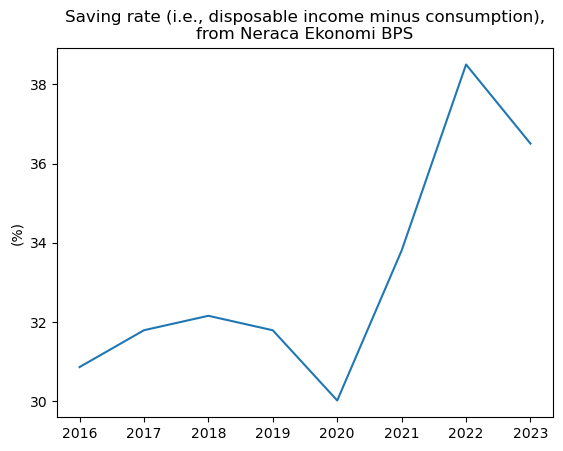

In [21]:
ax=sns.lineplot(data=det,x="tahun",y="srhh")
ax.set(xlabel="",ylabel="(%)",title="Saving rate (i.e., disposable income minus consumption),\nfrom Neraca Ekonomi BPS")

Sejak 2016, saving rate Indonesia terus meningkat. COVID-19 memaksa semua pihak mengurangi saving-nya, bahkan meningkatkan utang untuk menjaga konsumsi. Namun sejak itu, saving rate kembali naik bahkan lebih tinggi daripada biasanya. Sepertinya COVID-19 benar-benar memberi pukulan untuk kaum konsumen Indonesia.

Lebih jauh, saya nemu data menarik dari [Sistem Neraca Sosial Ekonomi (SNSE)](https://www.bps.go.id/id/publication/2024/10/31/9976e1b3df32ba9d98d76768/sistem-neraca-sosial-ekonomi-indonesia-2022.html) Indonesia 2022, courtesy of Prof AAY. Data disposable income dan gross saving dari situ sangat sangat menarik.

| No  | Institusi                                      | Disposable Income | Gross Saving |
| --- | ---------------------------------------------- | ----------------- | ------------------ |
| 1   | Rumah Tangga                                   | 11.368,51         | 1.231,47          |
|     | - Rumah Tangga 20%-1                           | 414,11            | -96,21            |
|     | - Rumah Tangga 20%-2                           | 924,70            | 34,63             |
|     | - Rumah Tangga 20%-3                           | 1.782,32          | 189,10            |
|     | - Rumah Tangga 20%-4                           | 2.657,59          | 326,76            |
|     | - Rumah Tangga 20%-5                           | 5.589,80          | 777,18            |
| 2   | Lembaga Non Profit yang Melayani Rumah Tangga  | 294,48            | 65,48             |
| 3   | Pemerintah                                     | 1.620,85          | 115,84            |
| 4   | Korporasi Non Finansial                        | 5.498,78          | 5.498,78          |
| 5   | Korporasi Finansial                            | 554,52            | 529,83            |
|     | **Total**                                      | **19.337,14**     | **7.441,39**      |

Gw coba bikin tabel pake pandas untuk ngitung saving rate dan benar saja opkors, makin kaya kelompok masyarakat, makin gede saving ratenya. Tentu ini minus orang ultra kaya yah. Dan ya, bottom 20% makan tabungan / utang di 2022. Pinjol?

In [14]:
wew=pd.read_csv("snse.txt")
wew['saving rate']=wew['Gross saving']/wew['Disposable Income']*100
wew

,No,Institusi,Disposable Income,Gross saving,saving rate
0,1.0,Rumah Tangga,11368.51,1231.47,10.832290
1,NaN,Rumah Tangga 20%-1,414.11,-96.21,-23.232957
2,NaN,Rumah Tangga 20%-2,924.70,34.63,3.744998
3,NaN,Rumah Tangga 20%-3,1782.32,189.10,10.609767
4,NaN,Rumah Tangga 20%-4,2657.59,326.76,12.295350
5,NaN,Rumah Tangga 20%-5,5589.80,777.18,13.903539
6,2.0,Lembaga Non Profit yang Melayani Rumah Tangga,294.48,65.48,22.235805
7,3.0,Pemerintah,1620.85,115.84,7.146867
8,4.0,Korporasi Non Finansial,5498.78,5498.78,100.000000
9,5.0,Korporasi Finansial,554.52,529.83,95.547501


## Labor share yang menurun

Beberapa analis mengatakan bahwa salah satu problemnya adalah lemahnya pertumbuhan upah. Reed, Pasha dan Gonzales dalam [reportnya untuk World Bank Group](https://documents1.worldbank.org/curated/en/099754312062434827/pdf/IDU11c5662011a9eb14aee18baa1e0efad04ad35.pdf) menuliskan tentang lemahnya pertumbuhan upah dan profit di perusahaan manufaktur dengan kepemilikan asing yang tinggi. Cuplikan gambar di bawah ini berasal dari report tersebut.

![](Picture1.png)

Di neraca ekonomi, kita juga dapat menghitung seberapa besar _primary income_ dibayarkan untuk banyak keperluan. Saya membaginya menjadi 3: pajak, biaya pegawai, dan profit. Profit sendiri isinya adalah income yang sudah dikurangi pajak dan pegawai. Saya plot di bawah, tapi pajak saya keluarkan karena angkanya kecil banget, sekitar 5% total neraca[^1].

[^1]: Angka 5% ini cukup menarik karena pph badan Indonesia angkanya jauh di atas itu. Ini bisa jadi 1 posting sendiri lagi. mungkin kapan-kapan deh.

[Text(0.5, 0, ''),
 Text(0, 0.5, '(%)'),
 Text(0.5, 1.0, 'Labor share (LS) and profit share (KS) of income, from Neraca Ekonomi BPS')]

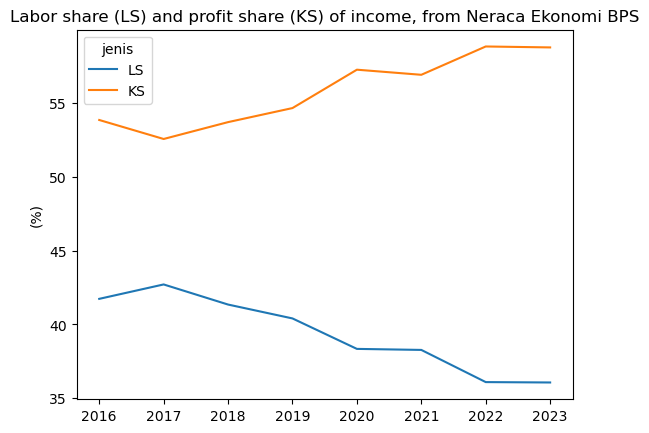

In [22]:
ax=sns.lineplot(data=dat,x="tahun",y="nilai",hue="jenis",palette="tab10")
ax.set(xlabel="",ylabel="(%)",title="Labor share (LS) and profit share (KS) of income, from Neraca Ekonomi BPS")


Dan cukup telrihat progresifnya peningkatan bagian pendapatan yang diserap oleh perusahaan. Seperti hipotesis di atas, peningkatan income share perusahaan lebih mungkin ditabung sementara peningkatan income share pegawai lebih mungkin dikonsumsi. Jadi setidaknya dari hasil ini, cukup wajar.

Anyway, sebenernya post ini cuma buat kasi liat grafik. Diskusi bisa kita lakukan di luar post ini. Let me know what you think.

Anyway, di bawah ini data yang saya pake. semua diunduh dari [Total Ekonomi - Neraca Institusi Terintegrasi ( triliun rupiah), 2016 - 2023](https://www.bps.go.id/id/statistics-table/1/MjE4MSMx/total-ekonomi---neraca-institusi-terintegrasi---triliun-rupiah---2016---2023.html) dengan sedikit olahan.

In [23]:
data

,tahun,L,K,T,va/output,LS,TS,KS,srhh
0,2016,40.576885,55.127270,4.295845,52.877975,41.728750,4.435895,53.835356,30.864658
1,2017,41.472019,53.934836,4.593145,53.108782,42.704020,4.746633,52.549347,31.795110
2,2018,39.977940,55.237447,4.784614,52.986106,41.343331,4.965863,53.690807,32.159447
3,2019,39.252272,55.950651,4.797077,52.971298,40.403369,4.954449,54.642181,31.793236
4,2020,37.304707,58.410155,4.285138,53.170697,38.341668,4.418889,57.239443,30.021169
5,2021,37.283856,58.021987,4.694157,53.484228,38.272325,4.833429,56.894245,33.807914
6,2022,35.453018,59.557783,4.989199,53.799988,36.094115,5.095040,58.810845,38.504459
7,2023,34.970118,60.019108,5.010774,53.400921,36.068580,5.184493,58.746927,36.506632
